# Sections around the ACC

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.path import Path
import seaborn as sns
import seaborn
import pandas as pd
import numpy as np
from importlib import reload
import cartopy.crs as ccrs
import cmocean.cm as cmo
import gsw

import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import processing_funcs as prf

In [2]:
reload(ef)
reload(ff);

## Testing

In [4]:
scales = [50,100,200]
sample_max = 12
variables = ['CT','SA','SPICE']

In [5]:
sect5     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-178)_lat:(-70,70)_ds_z.nc')
sect5_EKEct = ef.get_EKE_da(sect5, scales, sample_max, variables[0])

In [16]:
print(float(sect5.LONGITUDE.min()),float(sect5.LONGITUDE.max()))

-179.998 -178.001


In [6]:
test = sect5.where(sect5.LATITUDE>0).where(sect5.LATITUDE<5).dropna('N_PROF')
test

<xarray.Dataset>
Dimensions:            (N_PROF: 310, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF             (N_PROF) int64 6479 6480 6459 7304 ... 13538 14466 14209
    TIME               (N_PROF) datetime64[ns] 2006-10-13T03:07:18 ... 2023-0...
    LATITUDE           (N_PROF) float64 0.461 0.485 2.347 ... 3.046 1.007 1.499
    LONGITUDE          (N_PROF) float64 -179.6 -178.9 -180.0 ... -179.4 -178.4
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1992 1994 1996 1998
    N_PROF_NEW         (N_PROF) int64 65 67 76 133 410 ... 3597 3599 3624 3628
    MLD                (N_PROF) int64 28 6 46 26 18 44 68 ... 26 16 46 42 64 62
    month              (N_PROF) int64 10 10 1 6 10 12 12 12 ... 6 6 6 7 7 7 7 7
    month_frac         (N_PROF) float64 10.42 10.75 1.034 ... 7.471 7.929 7.958
    year               (N_PROF) int64 2006 2006 2007 2008 ... 2023 2023 2023
    year_frac          (N_PROF) float64 2.007e+03 2.007e+03 ... 2.024e+03
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 29.98 29.98 ... 2.114
    CYCLE_NUMBER       (N_PROF) float64 4.0 5.0 12.0 23.0 ... 60.0 69.0 122.0
    DATA_MODE          (N_PROF) object 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'R' 'A'
    DIRECTION          (N_PROF) object 'A' 'A' 'A' 'A' 'A' ... 'D' 'A' 'A' 'A'
    PLATFORM_NUMBER    (N_PROF) float64 5.901e+06 5.901e+06 ... 5.906e+06
    PRES               (N_PROF, PRES_INTERPOLATED) float32 5.8 5.8 ... 1.998e+03
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 34.76 34.76 ... 34.64
    SA                 (N_PROF, PRES_INTERPOLATED) float64 34.93 34.93 ... 34.82
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 21.56 21.56 ... 27.69
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 29.96 29.96 ... 2.255
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 4.1 4.1 ... 100.4
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 6.269 ... -0.08048
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/24
    Fetched_constraints:  [x=-180.00/-178.00; y=-70.00/70.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

In [7]:
test_temp_anom = test.CT - test.CT.mean('N_PROF')
ds_var = (test_temp_anom**2).mean('N_PROF')

In [9]:
#(test.CT - test.CT.mean('N_PROF')**2).plot(y='PRES_INTERPOLATED')

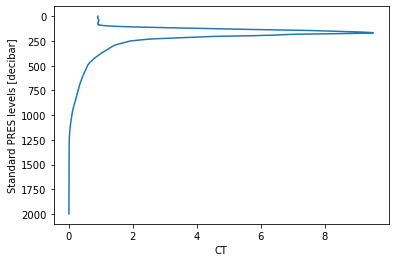

In [10]:
ds_var.plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()

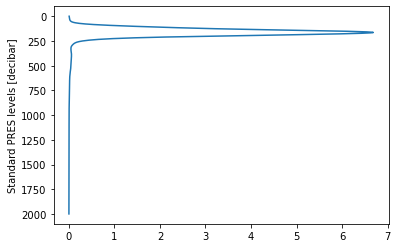

In [11]:
sect5_EKEct.where(sect5.LATITUDE>0).where(sect5.LATITUDE<5).dropna('N_PROF').isel(EKE=0).mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.gca().invert_yaxis()

In [29]:
sect5.SPICE.attrs['long_name'] = 'Spice'
sect5.SPICE.attrs['standard_name'] = ''
sect5.SPICE.attrs['unit'] = ''

In [34]:
sect5

<xarray.Dataset>
Dimensions:            (N_PROF: 3635, PRES_INTERPOLATED: 1000)
Coordinates:
  * N_PROF             (N_PROF) int64 619 620 624 625 ... 14146 14668 13172
    TIME               (N_PROF) datetime64[ns] 2002-03-14T19:27:01 ... 2023-0...
    LATITUDE           (N_PROF) float64 29.75 29.86 30.51 ... 48.34 -41.38
    LONGITUDE          (N_PROF) float64 -179.1 -179.2 -179.7 ... -178.0 -179.1
  * PRES_INTERPOLATED  (PRES_INTERPOLATED) int64 0 2 4 6 ... 1992 1994 1996 1998
    N_PROF_NEW         (N_PROF) int64 ...
    MLD                (N_PROF) int64 ...
    month              (N_PROF) int64 ...
    month_frac         (N_PROF) float64 ...
    year               (N_PROF) int64 ...
    year_frac          (N_PROF) float64 ...
Data variables:
    CT                 (N_PROF, PRES_INTERPOLATED) float64 19.46 19.46 ... 2.237
    CYCLE_NUMBER       (N_PROF) int64 ...
    DATA_MODE          (N_PROF) object ...
    DIRECTION          (N_PROF) object ...
    PLATFORM_NUMBER    (N_PROF) int64 ...
    PRES               (N_PROF, PRES_INTERPOLATED) float32 ...
    PSAL               (N_PROF, PRES_INTERPOLATED) float32 ...
    SA                 (N_PROF, PRES_INTERPOLATED) float64 ...
    SIG0               (N_PROF, PRES_INTERPOLATED) float64 ...
    TEMP               (N_PROF, PRES_INTERPOLATED) float32 ...
    sample_rate        (N_PROF, PRES_INTERPOLATED) float32 ...
    SPICE              (N_PROF, PRES_INTERPOLATED) float64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         /swot/SUM05/dbalwada/Argo_sync
    Fetched_by:           amf2288
    Fetched_date:         2023/08/24
    Fetched_constraints:  [x=-180.00/-178.00; y=-70.00/70.00; z=0.0/2000.0]
    Fetched_uri:          
    history:              Variables filtered according to DATA_MODE; Variable...

# Section Selection

In [3]:
box1 = [0,2,-70,0,0,2000]
box2 = [60,62,-70,20,0,2000]
box3 = [90,92,-70,15,0,2000]
box4 = [128,130,-70,-35,0,2000]
box5 = [-180,-178,-70,70,0,2000]
box6 = [-130,-128,-70,50,0,2000]
box7 = [-50,-48,-70,-35,0,2000]
box8 = [-25,-23,-70,70,0,2000]
#box9 = [-10,-8,-70,0,0,2000]
boxc = [-159,-157,22.75,34.5,0,2000]
boxn = [-32,-26,23,29,0,2000]
boxes= [box1, box2, box3, box4, box5, box6, box7, box8, boxc, boxn]

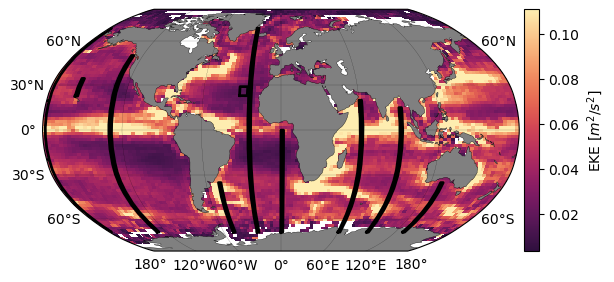

In [4]:
pf.plot_box(boxes)

In [5]:
scales = [50,100,200]
sample_max = 12
variables = ['CT','SA','SPICE']

In [6]:
sect1       = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(0,2)_lat:(-70,0)_ds_z.nc')

sect1_EKEct = ef.get_EKE_da(sect1, scales, sample_max, variables[0])
sect1_EKEsa = ef.get_EKE_da(sect1, scales, sample_max, variables[1])
sect1_EKEsp = ef.get_EKE_da(sect1, scales, sample_max, variables[2])


KeyboardInterrupt



In [ ]:
sect2       = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(60,62)_lat:(-70,20)_ds_z.nc')

sect2_EKEct = ef.get_EKE_da(sect2, scales, sample_max, variables[0])
sect2_EKEsa = ef.get_EKE_da(sect2, scales, sample_max, variables[1])
sect2_EKEsp = ef.get_EKE_da(sect2, scales, sample_max, variables[2])

In [ ]:
sect3       = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(90,92)_lat:(-70,15)_ds_z.nc')

sect3_EKEct = ef.get_EKE_da(sect3, scales, sample_max, variables[0])
sect3_EKEsa = ef.get_EKE_da(sect3, scales, sample_max, variables[1])
sect3_EKEsp = ef.get_EKE_da(sect3, scales, sample_max, variables[2])

In [ ]:
sect4       = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(128,130)_lat:(-70,-35)_ds_z.nc')

sect4_EKEct = ef.get_EKE_da(sect4, scales, sample_max, variables[0])
sect4_EKEsa = ef.get_EKE_da(sect4, scales, sample_max, variables[1])
sect4_EKEsp = ef.get_EKE_da(sect4, scales, sample_max, variables[2])

In [ ]:
sect5     = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-180,-178)_lat:(-70,70)_ds_z.nc')

sect5_EKEct = ef.get_EKE_da(sect5, scales, sample_max, variables[0])
sect5_EKEsa = ef.get_EKE_da(sect5, scales, sample_max, variables[1])
sect5_EKEsp = ef.get_EKE_da(sect5, scales, sample_max, variables[2])

In [ ]:
sect6       = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-130,-128)_lat:(-70,50)_ds_z.nc')

sect6_EKEct = ef.get_EKE_da(sect6, scales, sample_max, variables[0])
sect6_EKEsa = ef.get_EKE_da(sect6, scales, sample_max, variables[1])
sect6_EKEsp = ef.get_EKE_da(sect6, scales, sample_max, variables[2])

In [ ]:
sect7       = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-50,-48)_lat:(-70,-35)_ds_z.nc')

sect7_EKEct = ef.get_EKE_da(sect7, scales, sample_max, variables[0])
sect7_EKEsa = ef.get_EKE_da(sect7, scales, sample_max, variables[1])
sect7_EKEsp = ef.get_EKE_da(sect7, scales, sample_max, variables[2])

In [ ]:
sect8       = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-25,-23)_lat:(-70,70)_ds_z.nc')

sect8_EKEct = ef.get_EKE_da(sect8, scales, sample_max, variables[0])
sect8_EKEsa = ef.get_EKE_da(sect8, scales, sample_max, variables[1])
sect8_EKEsp = ef.get_EKE_da(sect8, scales, sample_max, variables[2])

In [ ]:
#sect9       = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-10,-8)_lat:(-70,0)_ds_z.nc')

#sect9_EKEct = ef.get_EKE_da(sect9, scales, sample_max, variables[0])
#sect9_EKEsa = ef.get_EKE_da(sect9, scales, sample_max, variables[1])
#sect9_EKEsp = ef.get_EKE_da(sect9, scales, sample_max, variables[2])

In [ ]:
Cole = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-159,-157)_lat:(22.75,34.5)_ds_z.nc')
NATRE = xr.open_dataset('/swot/SUM05/amf2288/sync-boxes/lon:(-32,-26)_lat:(23,29)_ds_z.nc')

In [ ]:
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','k','k']

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels=True)
#for n in range(0,len(boxes)):
#    ax.plot(posttobox(boxes[n][:2],boxes[n][2:])[0],postobox(boxes[n][:2],boxes[n][2:][1], #color=colors[n],transform=ccrs.PlateCCarree(),lw=2)

#ax.scatter(sect1.LONGITUDE,sect1.LATITUDE,transform=ccrs.PlateCarree(),color=colors[0],label='Section 1',s=0.05)
#ax.scatter(sect2.LONGITUDE,sect2.LATITUDE,transform=ccrs.PlateCarree(),color=colors[1],label='Section 2',s=0.05)
#ax.scatter(sect3.LONGITUDE,sect3.LATITUDE,transform=ccrs.PlateCarree(),color=colors[2],label='Section 3',s=0.05)
#ax.scatter(sect4.LONGITUDE,sect4.LATITUDE,transform=ccrs.PlateCarree(),color=colors[3],label='Section 4',s=0.05)
ax.scatter(sect5.LONGITUDE,sect5.LATITUDE,transform=ccrs.PlateCarree(),color=colors[4],label='Section 5',s=0.05)
#ax.scatter(sect6.LONGITUDE,sect6.LATITUDE,transform=ccrs.PlateCarree(),color=colors[5],label='Section 6',s=0.05)
#ax.scatter(sect7.LONGITUDE,sect7.LATITUDE,transform=ccrs.PlateCarree(),color=colors[6],label='Section 7',s=0.05)
ax.scatter(sect8.LONGITUDE,sect8.LATITUDE,transform=ccrs.PlateCarree(),color=colors[7],label='Section 8',s=0.05)
#ax.scatter(sect9.LONGITUDE,sect9.LATITUDE,transform=ccrs.PlateCarree(),color=colors[8],label='Section 9',s=0.05)
#ax.scatter(Cole .LONGITUDE,Cole .LATITUDE,transform=ccrs.PlateCarree(),color=colors[9],label='Cole 2012',s=0.05)
#ax.scatter(NATRE.LONGITUDE,NATRE.LATITUDE,transform=ccrs.PlateCarree(),color=colors[10],label='NATRE Box',s=0.05)

plt.legend(bbox_to_anchor=(0,0.7),markerscale=30)

## Potential Density

In [ ]:
#sect1_SIG1 = gsw.density.sigma1(sect1.SA, sect1.CT)
#sect2_SIG1 = gsw.density.sigma1(sect2.SA, sect2.CT)
#sect3_SIG1 = gsw.density.sigma1(sect3.SA, sect3.CT)
#sect4_SIG1 = gsw.density.sigma1(sect4.SA, sect4.CT)
sect5_SIG1 = gsw.density.sigma1(sect5.SA, sect5.CT)
#sect6_SIG1 = gsw.density.sigma1(sect6.SA, sect6.CT)
#sect7_SIG1 = gsw.density.sigma1(sect7.SA, sect7.CT)
sect8_SIG1 = gsw.density.sigma1(sect8.SA, sect8.CT)
#sect9_SIG1 = gsw.density.sigma1(sect9.SA, sect9.CT)

#sect1 = sect1.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect1_SIG1.data))
#sect2 = sect2.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect2_SIG1.data))
#sect3 = sect3.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect3_SIG1.data))
#sect4 = sect4.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect4_SIG1.data))
sect5 = sect5.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect5_SIG1.data))
#sect6 = sect6.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect6_SIG1.data))
#sect7 = sect7.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect7_SIG1.data))
sect8 = sect8.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect8_SIG1.data))
#sect9 = sect9.assign(SIG1=(['N_PROF','PRES_INTERPOLATED'], sect9_SIG1.data))

# T, S, SIG0, EKE Sections

In [ ]:
#        CT                     SA                      SIG0                    SPICE                CT gradient                   SA gradient                   Spice gradient
names = [cmo.thermal,           cmo.haline,             cmo.dense,              cmo.deep,            cmo.balance,                  cmo.balance,                  cmo.balance]
bounds = [np.linspace(-2,22,7), np.linspace(33,36.5,8), np.linspace(24,28.5,6), np.linspace(-2,5,7), np.linspace(-0.004,0.004,10), np.linspace(-0.004,0.004,10), np.linspace(-0.004,0.004,10)]
cmaps = []
norms = []

for n in range(0,len(names)):
    cmap = names[n]
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)
    norm = mpl.colors.BoundaryNorm(bounds[n], cmap.N)
    
    cmaps.append(cmap)
    norms.append(norm)

In [ ]:
sect   = sect5      .sortby('LATITUDE')#.where(sect6.sample_rate<sample_max)
EKE_ct = sect5_EKEct.sortby('LATITUDE').where(sect5_EKEct.mask==1).isel(EKE=1)
EKE_sa = sect5_EKEsa.sortby('LATITUDE').where(sect5_EKEsa.mask==1).isel(EKE=1)
EKE_sp = sect5_EKEsp.sortby('LATITUDE').where(sect5_EKEsp.mask==1).isel(EKE=1)

levels0  = np.linspace(sect.isel(PRES_INTERPOLATED=slice(500,1500)).SIG0.min(),sect.isel(PRES_INTERPOLATED=slice(500,1500)).SIG0.max(),6)
levels1  = np.linspace(sect.isel(PRES_INTERPOLATED=slice(500,1500)).SIG1.min(),sect.isel(PRES_INTERPOLATED=slice(500,1500)).SIG1.max(),6)

l1_ct = ff.get_filt_single(sect,scales[0],'CT')
l1_sa = ff.get_filt_single(sect,scales[0],'SA')
l1_sp = ff.get_filt_single(sect,scales[0],'SPICE')

l2_ct = ff.get_filt_single(sect,scales[1],'CT')
l2_sa = ff.get_filt_single(sect,scales[1],'SA')
l2_sp = ff.get_filt_single(sect,scales[1],'SPICE')

grad_ct = l2_ct.differentiate('PRES_INTERPOLATED')
grad_sa = l2_sa.differentiate('PRES_INTERPOLATED')
grad_sp = l2_sp.differentiate('PRES_INTERPOLATED')

In [ ]:
lat_points = []
for n in range(0,len(sect.LATITUDE)):
    array = np.full(len(sect.PRES_INTERPOLATED),sect.LATITUDE.isel(N_PROF=n).values)
    lat_points.append(array)
    
sect = sect.assign_coords(lat_points=(['N_PROF','PRES_INTERPOLATED'],lat_points))

In [ ]:
SA = np.linspace(int(sect.SA.min()), int(sect.SA.max())+1, 51)
CT = np.linspace(int(sect.CT.min()), int(sect.CT.max())+1, 51)

SA_grid, CT_grid = np.meshgrid(SA, CT)

rho = gsw.sigma0(SA_grid, CT_grid)
spice = gsw.spiciness0(SA_grid, CT_grid)

In [ ]:
plt.figure(figsize=(25,15))

plt.subplot(331)
l2_ct.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[0], norm=norms[0])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
#sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Conservative Temperature')

plt.subplot(332)
l2_sa.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[1], norm=norms[1])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Absolute Salinity')

plt.subplot(333)
l2_sp.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[3], norm=norms[3])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Spice')

plt.subplot(334)
grad_ct.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[4], norm=norms[4])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Conservative Temperature')

plt.subplot(335)
grad_sa.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[5], norm=norms[5])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Absolute Salinity')

plt.subplot(336)
grad_sp.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[6], norm=norms[6])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Spice')

plt.subplot(337)
np.log(EKE_ct).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('EKE of Temperature, Bin {} - {}'.format(scales[0], scales[1]))

plt.subplot(338)
np.log(EKE_sa).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('EKE of Salinity, Bin {} - {}'.format(scales[0], scales[1]))

plt.subplot(339)
np.log(EKE_sp).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('EKE of Spice, Bin {} - {}'.format(scales[0], scales[1]))

plt.subplots_adjust(hspace=0.3, wspace=0.15)

# Scatterplot and/or Histagrams

In [ ]:
plt.figure(figsize=(8,10))

plt.subplot(231)
plt.scatter(grad_ct,EKE_ct,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xlabel('Grad of CT')
plt.ylabel('EKE of Tracer, logscale')
plt.title('Conservative Temperature')

plt.subplot(232)
plt.scatter(grad_sa,EKE_sa,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xlabel('Grad of SA')
plt.ylabel('')
plt.title('Absolute Salinity')

plt.subplot(233)
plt.scatter(grad_sp,EKE_sp,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xlabel('Grad of Spice')
plt.ylabel('')
plt.title('Spice')

plt.subplot(234)
plt.scatter(np.abs(grad_ct),EKE_ct,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grad of CT, logscale')
plt.ylabel('EKE of Tracer, logscale')
plt.title('Conservative Temperature')

plt.subplot(235)
plt.scatter(np.abs(grad_sa),EKE_sa,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grad of SA, logscale')
plt.ylabel('')
plt.title('Absolute Salinity')

plt.subplot(236)
plt.scatter(np.abs(grad_sp),EKE_sp,s=0.1,color='tab:blue')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Grad of Spice, logscale')
plt.ylabel('')
plt.title('Spice')

plt.subplots_adjust(wspace=0.5, hspace=0.25)

# T-S Diagram for Profiles and Filtered Profiles

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(231)
sns.scatterplot(x=np.reshape(sect.SA.data,-1), y=np.reshape(sect.CT.data,-1), hue=np.reshape(sect.lat_points.data,-1), 
                linewidth=0, palette=sns.set_palette('flare',10),s=0.1)
plt.contour(SA, CT, rho, cmap='viridis')
plt.contour(SA, CT, spice, cmap='plasma', linestyles='--')
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Original Profiles')

plt.subplot(232)
sns.scatterplot(x=np.reshape(l1_sa.data,-1), y=np.reshape(l1_ct.data,-1), hue=np.reshape(sect.lat_points.data,-1), 
                linewidth=0, palette=sns.set_palette('flare',10),s=0.1)
plt.contour(SA, CT, rho, cmap='viridis')
plt.contour(SA, CT, spice, cmap='plasma', linestyles='--')
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Filtered at {}'.format(scales[0]))

plt.subplot(233)
sns.scatterplot(x=np.reshape(l2_sa.data,-1), y=np.reshape(l2_ct.data,-1), hue=np.reshape(sect.lat_points.data,-1), 
                linewidth=0, palette=sns.set_palette('flare',10),s=0.1)
plt.contour(SA, CT, rho, cmap='viridis')
plt.contour(SA, CT, spice, cmap='plasma', linestyles='--')
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Filtered at {}'.format(scales[1]))

plt.subplot(234)
plt.hist2d(np.reshape(sect.SA.data,-1),np.reshape(sect.CT.data,-1),bins=100,norm='log')
plt.colorbar()
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Original Profiles')

plt.subplot(235)
plt.hist2d(np.reshape(l1_sa.data,-1),np.reshape(l1_ct.data,-1),bins=100,norm='log')
plt.colorbar()
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Filtered at {}'.format(scales[0]))

plt.subplot(236)
plt.hist2d(np.reshape(l2_sa.data,-1),np.reshape(l2_ct.data,-1),bins=100,norm='log')
plt.colorbar()
plt.xlabel('Absolute Salinity')
plt.ylabel('Conservative Temperature')
plt.title('Filtered at {}'.format(scales[1]))

plt.subplots_adjust(wspace=0.25)

In [ ]:
spice_or = sect.SPICE.where(sect.LATITUDE>-45.5).where(sect.LATITUDE<-45).dropna('N_PROF')
spice_l1 = l1_sp.where(l1_sp.LATITUDE>-45.5).where(l1_sp.LATITUDE<-45).dropna('N_PROF')
spice_l2 = l2_sp.where(l2_sp.LATITUDE>-45.5).where(l2_sp.LATITUDE<-45).dropna('N_PROF')

plt.figure(figsize=(8,6))
plt.subplot(131)
for n in range(0,len(spice_or)):
    spice_or[n].plot(y='PRES_INTERPOLATED',linewidth=0.75)
plt.xlabel('Spice')
plt.gca().invert_yaxis()
plt.title('Original Profiles')
    
plt.subplot(132)
for n in range(0,len(spice_or)):
    spice_l1[n].plot(y='PRES_INTERPOLATED',linewidth=0.75)
plt.xlabel('Spice')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.title('Filtered at {}'.format(scales[0]))

plt.subplot(133)
for n in range(0,len(spice_or)):
    spice_l2[n].plot(y='PRES_INTERPOLATED',linewidth=0.75)
plt.xlabel('Spice')
plt.ylabel('')
plt.gca().invert_yaxis()
plt.title('Filtered at {}'.format(scales[1]))

plt.subplots_adjust(wspace=0.3)

# Old Versions of Various Plots

In [ ]:
plt.figure(figsize=(25,15))

plt.subplot(411)
sect.CT.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[0], norm=norms[0])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Conservative Temperature')

plt.subplot(412)
sect.SA.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[1], norm=norms[1])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Absolute Salinity')

plt.subplot(413)
sect.SIG0.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[2], norm=norms[2])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Potential Density')

plt.subplot(414)
sect.SPICE.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[3], norm=norms[3])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.title('Spice')

plt.subplots_adjust(hspace=0.5)

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(311)
np.log(EKE_sp).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin <{}'.format(scales[0]))

plt.subplot(312)
np.log(EKE_sp).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin {} - {}'.format(scales[0], scales[1]))

plt.subplot(313)
np.log(EKE_sp).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('Bin {} - {}'.format(scales[1], scales[2]))

plt.subplots_adjust(hspace=0.25)

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(311)
sect.SA.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[1], norm=norms[1])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
#sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Absolute Salinity')

plt.subplot(312)
sect.SA.differentiate('PRES_INTERPOLATED').plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[5], norm=norms[5])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
#sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Absolute Salinity')

plt.subplot(313)
np.log(EKE_sa).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
#sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('Pressure')
plt.title('EKE of Salinity, Bin {} - {}'.format(scales[0], scales[1]))

plt.subplots_adjust(hspace=0.3)

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(311)
sect.SPICE.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmaps[3], norm=norms[3])
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
#sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('Spice')

plt.subplot(312)
grad_sp.plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.balance,vmin=-0.01,vmax=0.01)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
#sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('')
plt.title('First Derivative of Spice')

plt.subplot(313)
np.log(EKE_sp).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.25)
#sect.SIG1.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels1, colors='y', linewidths=0.25)
plt.gca().invert_yaxis()
plt.xlabel('Latitude °N')
plt.ylabel('Pressure')
plt.title('Spice Variance, Bin {}m - {}m'.format(scales[0], scales[1]))

plt.subplots_adjust(hspace=0.3)

# CCS Application Figure

In [ ]:
profn60 = sect.where(sect.LATITUDE>-60.25).where(sect.LATITUDE<-59.75).dropna('N_PROF').isel(N_PROF=0)
profn45 = sect.where(sect.LATITUDE>-45.25).where(sect.LATITUDE<-44.75).dropna('N_PROF').isel(N_PROF=0)
profpn0 = sect.where(sect.LATITUDE<0.25)  .where(sect.LATITUDE>-0.25) .dropna('N_PROF').isel(N_PROF=0)
profp40 = sect.where(sect.LATITUDE<40.25) .where(sect.LATITUDE>39.75) .dropna('N_PROF').isel(N_PROF=0)
profp60 = sect.where(sect.LATITUDE<60.25) .where(sect.LATITUDE>59.75) .dropna('N_PROF').isel(N_PROF=0)

In [ ]:
%%time
fig = plt.figure(figsize=(8,5))

ax1 = fig.add_axes([0, 0, 0.15, 1])
profn45.CT.plot(y='PRES_INTERPOLATED',ax=ax1,color='tab:blue')
plt.ylim([2000,0])
ax1.set_xlabel('Conservative Temperature [°C]',color='tab:blue')
ax1.set_ylabel('Interpolated Pressure (decibars)')
ax1.set_title('')

ax2 = ax1.twiny()
profn45.SA.plot(y='PRES_INTERPOLATED',ax=ax2,color='tab:orange')
ax2.set_xlabel('Absolute Salinity [g/kg]',color='tab:orange')
ax2.set_title('')


ax3 = fig.add_axes([0.25,0,0.15,1])
profn45.SPICE.plot(y='PRES_INTERPOLATED',ax=ax3,color='tab:green')
plt.ylim([2000,0])
ax3.set_xlabel('Spice [kg/m^3]',color='tab:green')
ax3.set_ylabel('Interpolated Pressure (decibars)')
ax3.set_title('')

ax4 = ax3.twiny()
profn45.SIG0.plot(y='PRES_INTERPOLATED',ax=ax4,color='tab:red')
ax4.set_xlabel('Potential Density [kg/m^3]',color='tab:red')
ax4.set_ylabel('Interpolated Pressure (decibars)')
ax4.set_title('')


ax5 = fig.add_axes([0.50, 0, 0.50, 1])
sns.scatterplot(x=np.reshape(sect.SA.data,-1), y=np.reshape(sect.CT.data,-1), hue=np.reshape(sect.lat_points.data,-1),linewidth=0, palette=sns.set_palette('flare',10),s=0.1,ax=ax5)
contour_rho   = plt.contour(SA, CT, rho, cmap='viridis')
contour_spice = plt.contour(SA, CT, spice, cmap='plasma', linestyles='--')
ax5.clabel(contour_rho)
ax5.clabel(contour_spice)
ax5.set_ylabel('Conservative Temperature [°C]',color='tab:blue')
ax5.set_xlabel('Absolute Salinity [g/kg]',color='tab:orange')
ax5.set_title('')

plt.show();

In [ ]:
fig = plt.figure(figsize=(8,2))
ax1 = fig.add_axes([0,0,0.30,1],projection=ccrs.Robinson())
#ax1.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.set_global()
ax1.gridlines(draw_labels=True)
ax1.scatter(sect.LONGITUDE,sect.LATITUDE,transform=ccrs.PlateCarree(),color=colors[0],label='Section 1',s=0.05)

ax2 = fig.add_axes([0.45, 0, 0.55, 1])
np.log(EKE_sp).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True,ax=ax2)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1,ax=ax2)
plt.ylabel('Interpolated Pressure (decibars)')
plt.xlabel('Latitude °N')
plt.ylim([2000,0])
ax2.set_title('Variance of Spice')

In [ ]:
fig = plt.figure(figsize=(8,2))
ax1 = fig.add_axes([0,0,0.30,1],projection=ccrs.Robinson())
#ax1.axes(projection=ccrs.Robinson())
ax1.coastlines()
ax1.set_global()
ax1.gridlines(draw_labels=True)
ax1.scatter(sect.LONGITUDE,sect.LATITUDE,transform=ccrs.PlateCarree(),color=colors[0],label='Section 1',s=0.05)

ax2 = fig.add_axes([0.45, 0, 0.55, 1])
np.log(EKE_sp).plot(x='LATITUDE',y='PRES_INTERPOLATED',cmap=cmo.dense,robust=True,ax=ax2)
sect.SIG0.plot.contour(x='LATITUDE', y='PRES_INTERPOLATED', levels=levels0, colors='k', linewidths=0.1)
ax2.set_ylabel('Interpolated Pressure (decibars)')
ax2.set_xlabel('Latitude °N')
ax2.set_ylim([2000,0])
ax2.set_title('Variance of Spice')